# <center> **TikTok Project**
## <center> **Regression Analysis**

* The data team is working on **`machine learning model`** to determine whether a video contains a **`claim`** or whether it offers an **`opinion`**.
* TikTok can reduce the **`backlog`** of user reports and prioritize them more efficiently.
* The team is getting closer to completing the project, having completed an initial **`plan of action`**, **`EDA`**, and **`hypothesis testing`**.
* TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. 
* The data team observed that if a user is verified, they are much more likely to post opinions. 
* Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to **`verified users`**. 
* Therefore, you have been asked to conduct a **`logistic regression`** using **`verified status`** as the outcome variable. 
* The results may be used to inform the final model related to predicting whether a video is a **`claim`** vs an **`opinion`**.
* The notebook is divided into three parts: 
    * **Part 1:** EDA & Checking Model Assumptions
        * What are some purposes of EDA before constructing a logistic regression model?
    * **Part 2:** Model Building and Evaluation
        * What resources do you find yourself using as you complete this stage?
    * **Part 3:** Interpreting Model Results
        * What key insights emerged from your model(s)?
        * What business recommendations do you propose based on the models built?

## **1. Imports**

In [96]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [97]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

* **Question 1 :** What are some purposes of EDA before constructing a logistic regression model?
    * The purposes of EDA before constructing a logistic regression model are
        1) Identify data anomalies such as **`outliers`** and **`class imbalance`** that might affect the modeling
        2) Verify model **`assumptions`** such as no severe **`multicollinearity`**

## **2. Explore Data - EDA**

In [98]:
# Display first few rows
print(data.columns)
data.head()

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [99]:
# Get number of rows and columns
print(data.shape) 
# Get data types of columns
print(data.dtypes)
# Get basic information
data.info()

(19382, 12)
#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  o

In [100]:
# Generate basic descriptive stats
data[["video_duration_sec",
      "video_view_count", 
      "video_like_count", 
      "video_share_count", 
      "video_download_count",
      "video_comment_count"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
video_duration_sec,19382.0,32.42,16.23,5.0,18.00,32.0,47.00,60.0
video_view_count,19084.0,254708.56,322893.28,20.0,4942.50,9954.5,504327.00,999817.0
video_like_count,19084.0,84304.64,133420.55,0.0,810.75,3403.5,125020.00,657830.0
video_share_count,19084.0,16735.25,32036.17,0.0,115.00,717.0,18222.00,256130.0
video_download_count,19084.0,1049.43,2004.30,0.0,7.00,46.0,1156.25,14994.0
video_comment_count,19084.0,349.31,799.64,0.0,1.00,9.0,292.00,9599.0


In [ ]:
# Check for missing values
data.isna().sum()/data.shape[0] *100
data.dropna(inplace=True, axis=0)
# Check for duplicates
data.duplicated().sum() # no duplicates 

0

### **2.1. Outliers Analysis :**

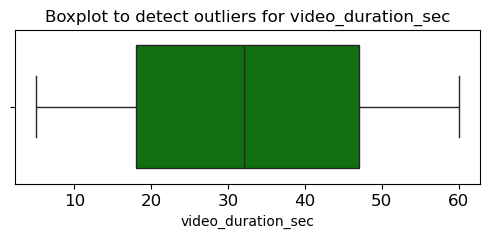

In [102]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'], orient='h', color='green')
plt.show()

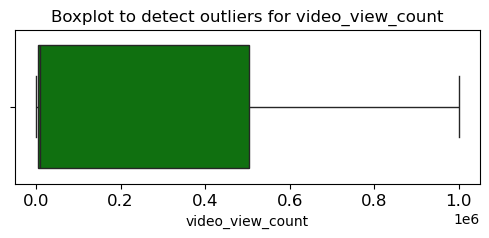

In [103]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'], orient='h', color='green')
plt.show()

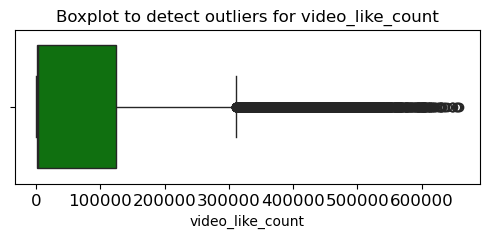

In [104]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'], color='green')
plt.show()

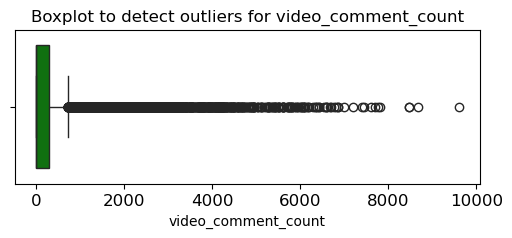

In [105]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'], color='green')
plt.show()

In [106]:
# Check for and handle outliers

percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [107]:
# Check for and handle outliers

percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

* Check class balance of the target variable. 
* Remember, the goal is to predict whether the user of a given post is **`verified`** or **`unverified`**.

In [108]:
# Check class balance
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

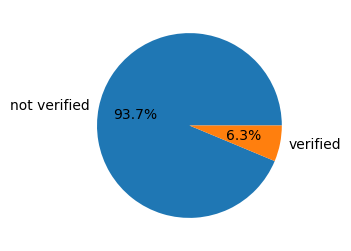

In [109]:
plt.figure(figsize=(3,3))
plt.pie(data["verified_status"].value_counts(normalize=True), 
        labels=data["verified_status"].value_counts(normalize=True).index, 
        autopct='%1.1f%%')
plt.show()

* Approximately 93.7% of the dataset represents videos posted by **`unverified accounts`** 
* 6.3% represents videos posted by **`verified accounts`**. 
* So the outcome variable is not very balanced
* Use **`resampling`** to create class balance in the outcome variable.

In [110]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

* Get the average **`video_transcription_text`** length for videos posted by **`verified accounts`** 
* Get the average **`video_transcription_text`** length for videos posted by **`unverified accounts`**.
* Extract the length of each **`video_transcription_text`** and add this as a column to the dataframe, so that it can be used as a potential feature in the model

In [111]:
# Get the average `video_transcription_text` length for claims and 
# the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", 
                "video_transcription_text"]].groupby(
                    by="verified_status")[["video_transcription_text"]].agg(
                        func=lambda array: np.mean([len(text) for text in array])
                        ).round(2)

,video_transcription_text
verified_status,
not verified,89.40
verified,84.57


In [112]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))
# Second Method: 
# data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(len)

In [113]:
# Display first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


* Visualize the distribution of **`video_transcription_text`** length for videos posted by *`verified accounts`* and videos posted by **`unverified accounts`**.

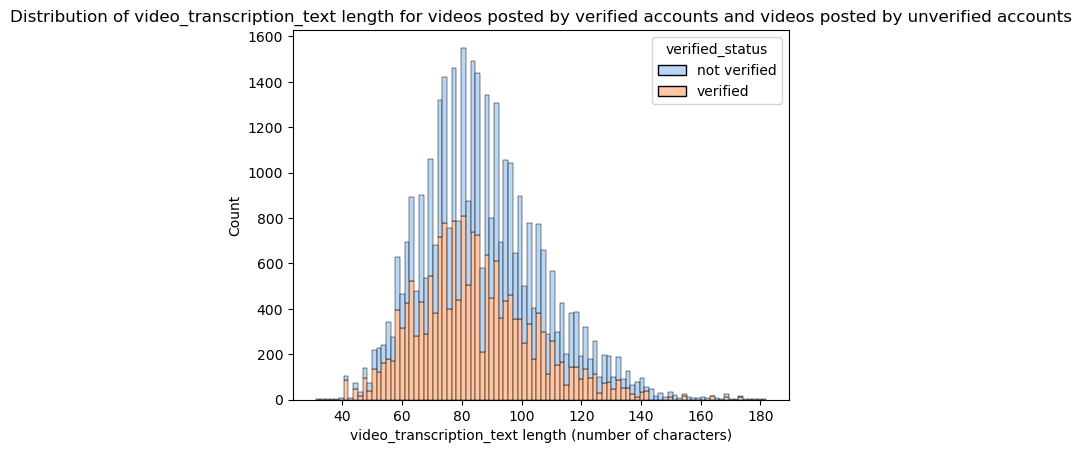

In [114]:
# Visualize the distribution of `video_transcription_text` length 
# for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **2.2 Examine correlations**

#### **2.2.1 The Correlation matrix :** 

In [115]:
# Code a correlation matrix to help determine most correlated variables
# Exclude video_Id 
data_upsampled[['video_duration_sec','video_view_count',	
                'video_like_count',	'video_share_count',	
                'video_download_count',	'video_comment_count',	
                'text_length']].corr().round(4) * 100

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,100.00,1.36,0.45,0.22,0.40,-0.11,-0.30
video_view_count,1.36,100.00,85.69,71.13,69.00,74.84,24.47
video_like_count,0.45,85.69,100.00,83.21,80.55,81.80,21.67
video_share_count,0.22,71.13,83.21,100.00,71.01,67.13,17.17
video_download_count,0.40,69.00,80.55,71.01,100.00,79.37,17.34
video_comment_count,-0.11,74.84,81.80,67.13,79.37,100.00,21.77
text_length,-0.30,24.47,21.67,17.17,17.34,21.77,100.00


#### **2.2.2. The Correlation Heatmap :** 

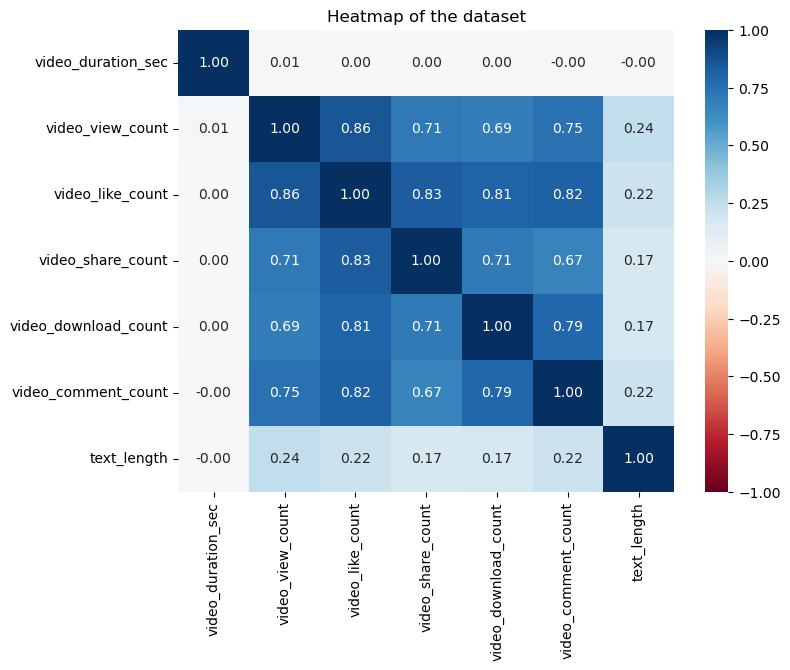

In [116]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", 
                    "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", 
                    "video_download_count", "video_comment_count", 
                    "text_length"]]
    .corr(numeric_only=True), 
    annot=True, fmt=".2f", 
    cmap="RdBu", 
    center=0, vmin=-1, vmax=1)
plt.title("Heatmap of the dataset")
plt.show()

#### **2.2.3 Check model assumption :** 
* One of the model assumptions for logistic regression is **`no severe multicollinearity`** among the features. 
* The above heatmap shows that the following pair of variables are strongly correlated: 
    * **`video_view_count`** and **`video_like_count`** (0.86 correlation coefficient).
* To build a **logistic regression model** that meets this assumption, you could exclude **`video_like_count`**. 
* Among the variables that quantify video metrics, you could keep :
    * **`video_view_count`**
    * **`video_share_count`**
    * **`video_download_count`** 
    * **`video_comment_count`**

## **3. Model Building** 
* After analysis and deriving variables with close relationships, it is time to begin constructing the model.


### **3.1. Select variables**

In [117]:
# Select outcome variable
y = data_upsampled["verified_status"]
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", 
                    "author_ban_status", "video_view_count", 
                    "video_share_count", "video_download_count", 
                    "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


* **`video_id`** column is not selected as features here, because they do not seem to be helpful for predicting whether a video presents a claim or an opinion. 
* Also, **`video_like_count`** is not selected as a feature here, because it is **strongly correlated **with other features, as discussed earlier. 
* As you know, **logistic regression** has a **no multicollinearity** model assumption that needs to be met.

### **3.2. Train-test split**

In [118]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [119]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### **3.3. Encode variables**

In [120]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [121]:
# Get unique values in `claim_status`
print(X_train["claim_status"].unique())
# Get unique values in `author_ban_status`
print(X_train["author_ban_status"].unique())

['opinion' 'claim']
['active' 'under review' 'banned']


* As shown above, the **`claim_status`** and **`author_ban_status`** features are each of data type **`object`** currently. 
* In order to work with the implementations of models through **`sklearn`**, these categorical features will need to be made numeric. 
* One way to do this is through **`one-hot encoding`**.

In [122]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]
# Display first few rows
print(X_train_to_encode.head())

# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
# Get feature names from encoder
print(X_encoder.get_feature_names_out())

# Display first few rows of encoded training features
X_train_encoded

      claim_status author_ban_status
33058      opinion            active
20491      opinion            active
25583      opinion            active
18474      opinion            active
27312      opinion            active
['claim_status_opinion' 'author_ban_status_banned'
 'author_ban_status_under review']


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [123]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [124]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [125]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head().T

,0,1,2,3,4
video_duration_sec,33.0,52.0,37.0,57.0,21.0
video_view_count,2252.0,6664.0,6327.0,1702.0,3842.0
video_share_count,23.0,550.0,257.0,28.0,101.0
video_download_count,4.0,53.0,3.0,0.0,1.0
video_comment_count,0.0,2.0,0.0,0.0,0.0
claim_status_opinion,1.0,1.0,1.0,1.0,1.0
author_ban_status_banned,0.0,0.0,0.0,0.0,0.0
author_ban_status_under review,0.0,0.0,0.0,0.0,0.0


In [126]:
# Check data type of outcome variable
y_train.dtype
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [127]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)
# Encode the training outcome variable
# Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
# Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### **3.4. Build the model**

In [128]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### **3.5. Results and evaluation**

Encode categorical features in the testing set using an appropriate method.

In [129]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
# Display first few rows
X_test_to_encode.head()
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)
# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [130]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
# Display first few rows
X_test_encoded_df.head()
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)
# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [131]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [132]:
# Display the true labels of the testing set
print(y_test)
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
# Display the encoded testing outcome variable
y_test_final

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object


array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [133]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

- The number of features (`8`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`26826`) and testing (`8942`).

### **3.6. Visualize model results**

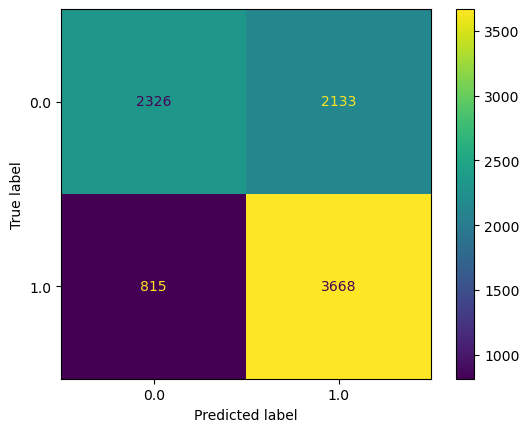

In [134]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
# Plot confusion matrix
log_disp.plot()
# Display plot
plt.show()

1) The upper-left quadrant displays the number of **`true negatives`**: number of videos posted by unverified accounts  
    that the model accurately classified as so.
2) The upper-right quadrant displays the number of **`false positives`**: number of videos posted by unverified accounts  
    that the model misclassified as posted by verified accounts.
3) The lower-left quadrant displays the number of **`false negatives`**: number of videos posted by verified accounts  
    that the model misclassified as posted by unverified accounts.
4) The lower-right quadrant displays the number of **`true positives`**: number of videos posted by verified accounts  
    that the model accurately classified as so.  
    
    **A perfect model would yield all true negatives and true positives, and no false negatives or false positives**

In [135]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



* The classification report above shows that the logistic regression model achieved: 
    * precision of 63% 
    * recall of 82%, 
    * accuracy of 67%. 
* Note that the precision and recall scores are taken from the **`"not verified"`** row of the output because that is the **`target class`**  
    that we are most interested in predicting. 
* The **`"verified"`** class has its own **`precision/recall`** metrics, and the weighted average represents the combined metrics  
    for both classes of the target variable.

### **3.7. Interpret model coefficients**

In [138]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.453764e-03
1,video_view_count,-1.688467e-07
2,video_share_count,4.826081e-06
3,video_download_count,-8.108813e-05
4,video_comment_count,4.482794e-04
5,claim_status_opinion,1.702595e+00
6,author_ban_status_banned,-4.484259e-01
7,author_ban_status_under review,-9.866498e-02


## **4. Conclusion**
- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. 
- We decided to drop **`video_like_count`** from the model building.
- Based on the **`logistic regression model`**, each additional second of the video is associated with 0.002 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a **`precision of 63%`** is less than ideal, but a **`recall of 82%`** is very good. 
- Overall **`accuracy`** is towards the lower end of what would typically be considered acceptable. 
- We developed a logistic regression model for verified status based on video features. 
- The model had decent predictive power. 
- Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. 
- Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.